In [1]:
!pip install pytorch-adapt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

from pytorch_adapt.datasets import get_mnist_mnistm, get_office31, get_officehome

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

inv_normalize = torchvision.transforms.Normalize(
    mean=[-m / s for m, s in zip(mean, std)], std=[1 / s for s in std]
)


def imshow(img, figsize=(8, 4)):
    img = inv_normalize(img)
    npimg = img.numpy()
    plt.figure(figsize=figsize)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def imshow_many(datasets, src, target):
    d = datasets["train"]
    for name in ["src_imgs", "target_imgs"]:
        domains = src if name == "src_imgs" else target
        if len(domains) == 0:
            continue
        print(domains)
        imgs = [d[i][name] for i in np.random.choice(len(d), size=16, replace=False)]
        imshow(torchvision.utils.make_grid(imgs))

['mnist']


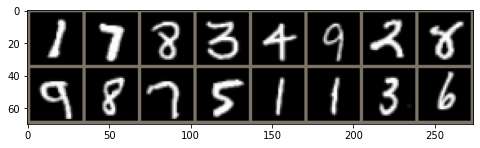

['mnistm']


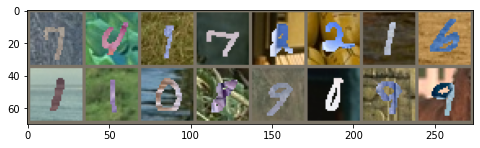

In [4]:
src, target = ["mnist"], ["mnistm"]
datasets = get_mnist_mnistm(src, target, folder=".", download=True)
imshow_many(datasets, src, target)

['amazon']


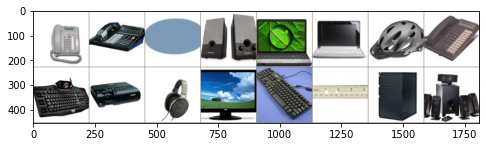

['dslr']


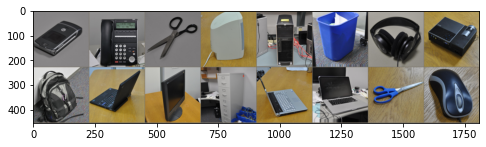

['webcam']


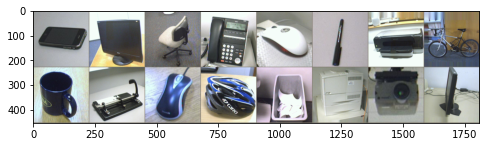

In [5]:
for src, target in [(["amazon"], ["dslr"]), (["webcam"], [])]:
    datasets = get_office31(src, target, folder=".", download=True)
    imshow_many(datasets, src, target)

['art']


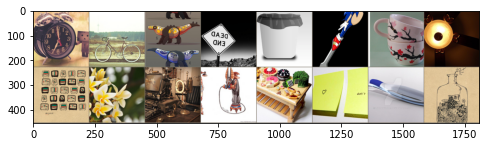

['clipart']


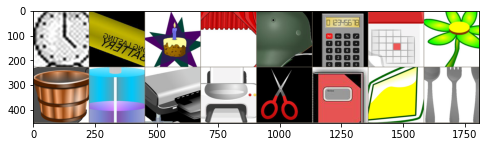

['product']


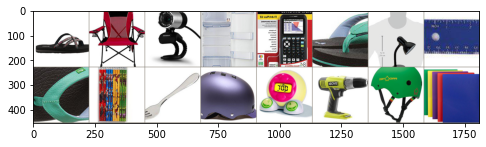

['real']


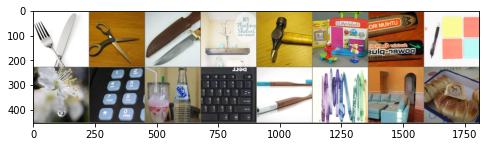

In [7]:
for src, target in [(["art"], ["clipart"]), (["product"], ["real"])]:
    datasets = get_officehome(src, target, folder=".", download=True)
    imshow_many(datasets, src, target)